
# Project: Soccer DB Sql

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



Copyrights MahmoudKhorshed 2022

<a id='intro'></a>
# Introduction
## The ultimate Soccer database for data analysis 
### European Soccer Database



##  We get Data for European Soccer Database (Players-Matches-Leagues) from 2008 to 2016
### 1- Question 1   What teams improved the most over the time period ?   
### 2- Question 2   Which players had the most penalties ?
### 3- Question 3   What team attributes lead to the most victroies ?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
from sqlalchemy import create_engine
engine=create_engine("sqlite:///database.sqlite")
#conn=engine.connect()
engine.table_names()


['Country',
 'League',
 'Match',
 'Player',
 'Player_Attributes',
 'Team',
 'Team_Attributes',
 'sqlite_sequence']

In [3]:
# convert database sql to Dataframes
df_Country=pd.read_sql_query("""SELECT *
                                FROM Country ;""",engine)
df_League=pd.read_sql_query("""SELECT *
                                FROM League ;""",engine)
df_Match=pd.read_sql_query("""SELECT *
                               FROM Match ;""",engine)
df_Team=pd.read_sql_query("""SELECT *
                              FROM Team ;""",engine)
df_Player=pd.read_sql_query("""SELECT *
                              FROM Player ;""",engine)
df_Team_Attributes=pd.read_sql_query("""SELECT *
                         FROM Team_Attributes ;""",engine)
df_Player_Attributes=pd.read_sql_query("""SELECT *
                          FROM Player_Attributes ;""",engine)


In [4]:
#save the data to csv files
#df_Player_Attributes.to_csv('Player_Attributes',index=False)
#df_Team_Attributes.to_csv('Team_Attributes',index=False)
#df_Country.to_csv('Country.csv',index=False)
#df_Player.to_csv('Player.csv',index=False)
#df_League.to_csv('League.csv',index=False)
#df_Match.to_csv('Match.csv',index=False)
#df_Team.to_csv('Team.csv',index=False)



## Define a function 


In [5]:
def Drop_columns(DataFrame,Name):
    
  """ this function Gets two argument 
  1- the specfied dataframe
  2- any name in th columns
  and drop any column contains partially or totally the 2nd argument (Name)
  """ 
  for col in DataFrame.columns:
        if Name in col:
            DataFrame.drop(col,axis=1,inplace=True)

### Another soln

#Unused_col = ['team_fifa_api_id','id','buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','chanceCreationPassingClass','chanceCreationCrossingClass','buildUpPlayPositioningClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']
#df_Team_Attributes.drop(Unused_col,axis=1,inplace=True)

        



### Data Cleaning

Data Cleaning (Soccer dataset cleaning):

1- We need to fill Nan cells in columns with numerical values with the mean value.              ##checked

2- We need to remove the unused and unimportnat column like ('home_player_X1',B365D,WHH ) and their similar ###checked

3- We need to remove the NaN cells from dataset. #checked

4- We need to convert the dtype of column ('datetime') values to datetime dtype. ###checked

5- We need to remove the unnecessary characters and strip spaces from these names.

6- Save all these changes to a new csv file

### i will work with DataFrames that should want to cleaned and assessed 
i.e 

1- Match

2- Player Attributes

3-Team Attributes

4- Counrty-league

### 1- fill Nan cell with numerical values

In [6]:
# no of nan values in df_Match
df_Match.isnull().sum().sum()

407395

In [7]:
# no of nan values in df_Player_Attributes

df_Player_Attributes.isnull().sum().sum()

47301

In [8]:
# no of nan values in df_Team_Attributes

df_Team_Attributes.isnull().sum().sum()

969

In [9]:
#show the first five values
df_Team_Attributes.head(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [10]:
df_Team_Attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [11]:
df_Match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [12]:
df_Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [13]:
#drop unused columns
df_Match.drop(df_Match.columns[11:],axis=1,inplace=True)

In [14]:
df_Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal'],
      dtype='object')

In [15]:
#fill NAN values numric with mean values in df_match
df_Match.fillna(df_Match.mean(),inplace=True)

In [16]:
#check if there are NAN values or Not
df_Match.isnull().sum().sum()

0

In [17]:
df_Player_Attributes.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [18]:
#drop unused columns
df_Player_Attributes.drop(df_Player_Attributes.columns[5:33],axis=1,inplace=True) #33 unitl penalties


In [19]:
df_Player_Attributes.drop(df_Player_Attributes.columns[6:],axis=1,inplace=True) #6 after penalties


In [20]:
df_Player_Attributes.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'penalties'],
      dtype='object')

In [21]:
#check if there are NAN values or Not
df_Player_Attributes.isnull().sum()

id                      0
player_fifa_api_id      0
player_api_id           0
date                    0
overall_rating        836
penalties             836
dtype: int64

In [22]:
df_Player_Attributes.drop(['overall_rating'],axis=1,inplace=True) #remove columns over all rating because it is unuseful


In [23]:
#we fill nan values (969 ) in df_Team_Attributes
df_Team_Attributes.fillna(df_Team_Attributes.mean(),inplace=True)

In [24]:
df_Team_Attributes.isnull().sum().sum()

0

In [25]:
df_Player_Attributes.isnull().sum().sum()

836

### 2- drop unused columns

In [26]:
#check duplicated data
df_Match.duplicated().sum()


0

In [27]:
#check duplicated data
df_Team_Attributes.duplicated().sum()

0

In [28]:
#check duplicated data
df_Player_Attributes.duplicated().sum()

0

In [29]:
#remove duplicated data if there are !
df_Match.drop_duplicates(inplace=True)


In [30]:
## drop columns in  team attributes using Function i created at first 
Drop_columns(df_Team_Attributes,'Class')            
df_Team_Attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth'],
      dtype='object')

In [31]:
df_Team.drop(['id','team_short_name'],axis=1,inplace=True)
df_Team.columns

Index(['team_api_id', 'team_fifa_api_id', 'team_long_name'], dtype='object')

In [32]:
#remove specified unused columns
df_Match.drop(['id','stage','match_api_id','date'],axis=1,inplace=True)


In [33]:
df_Player_Attributes.drop(['id','date'],axis=1,inplace=True) 


In [34]:
#get data types of columns
df_Player_Attributes.dtypes

player_fifa_api_id      int64
player_api_id           int64
penalties             float64
dtype: object

In [35]:
df_Match.head(1) 

,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,9987,9993,1,1


In [36]:
df_Player_Attributes.head(1)


,player_fifa_api_id,player_api_id,penalties
0,218353,505942,48.0


In [37]:
df_Team_Attributes.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,434,9930,2010-02-22 00:00:00,60,48.607362,50,60,65,55,50,55,45


### 3- drop Nan cells 

In [38]:
df_Match.isnull().sum()
#there are no Nan cells

country_id          0
league_id           0
season              0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

In [39]:
df_Player_Attributes.isnull().sum()

player_fifa_api_id      0
player_api_id           0
penalties             836
dtype: int64

### 4- convert dtypes 

In [40]:
#convert object data type to datetime type
df_Team_Attributes['date']=pd.to_datetime(df_Team_Attributes['date'])
df_Team_Attributes.dtypes

id                                 int64
team_fifa_api_id                   int64
team_api_id                        int64
date                      datetime64[ns]
buildUpPlaySpeed                   int64
buildUpPlayDribbling             float64
buildUpPlayPassing                 int64
chanceCreationPassing              int64
chanceCreationCrossing             int64
chanceCreationShooting             int64
defencePressure                    int64
defenceAggression                  int64
defenceTeamWidth                   int64
dtype: object

In [41]:
### convert  buildUpPlayDribbling  (Float to  Int)
df_Team_Attributes['buildUpPlayDribbling']=df_Team_Attributes['buildUpPlayDribbling'].astype(int)
df_Team_Attributes.dtypes

id                                 int64
team_fifa_api_id                   int64
team_api_id                        int64
date                      datetime64[ns]
buildUpPlaySpeed                   int64
buildUpPlayDribbling               int64
buildUpPlayPassing                 int64
chanceCreationPassing              int64
chanceCreationCrossing             int64
chanceCreationShooting             int64
defencePressure                    int64
defenceAggression                  int64
defenceTeamWidth                   int64
dtype: object

### 5- remove the unnecessary characters and strip spaces

In [42]:
df_Match.rename(columns=lambda x:x.strip().lower().replace(" ","_"),inplace=True)
df_Match.head()

,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,9987,9993,1,1
1,1,1,2008/2009,10000,9994,0,0
2,1,1,2008/2009,9984,8635,0,3
3,1,1,2008/2009,9991,9998,5,0
4,1,1,2008/2009,7947,9985,1,3


### 6- save the cleaned data


In [43]:
df_Match_cleaned=df_Match
df_Match_cleaned.to_csv('MatchCL.csv',index=False)

In [44]:
df_Player_Attributes_cleaned=df_Player_Attributes
df_Player_Attributes_cleaned.to_csv('Player_Attributes_CL.csv',index=False)

In [45]:
df_Team_Attributes_cleaned=df_Team_Attributes
df_Team_Attributes_cleaned.to_csv('df_Team_Attributes_CL.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='Quest1'></a>

# Research  Question 1  What team attributes lead to the most victroies ?

### First we Join DataFrame (Country+League)

In [46]:
df_Country_League=pd.merge(df_League,df_Country,on='id',how='inner')
df_Country_League.head(1)

,id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium


### Drop unused columns

In [47]:
df_Country_League.drop(['id'],axis=1,inplace=True);


### Rename columns with Appropiate names 

In [48]:
df_Country_League.rename(columns = {'name_x': 'League_Name', 'name_y': 'Country_Name'}, inplace =True)
df_Country_League.head(1)

,country_id,League_Name,Country_Name
0,1,Belgium Jupiler League,Belgium


### Second we Join DataFrame (Team + Team_Attributes)


In [49]:
df_Team.head(1)

,team_api_id,team_fifa_api_id,team_long_name
0,9987,673.0,KRC Genk


In [50]:
df_Team_Attributes_cleaned.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,434,9930,2010-02-22,60,48,50,60,65,55,50,55,45


In [51]:
df_Team.info()
df_Team_Attributes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 7.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 13 columns):
id                        1458 non-null int64
team_fifa_api_id          1458 non-null int64
team_api_id               1458 non-null int64
date                      1458 non-null datetime64[ns]
buildUpPlaySpeed          1458 non-null int64
buildUpPlayDribbling      1458 non-null int64
buildUpPlayPassing        1458 non-null int64
chanceCreationPassing     1458 non-null int64
chanceCreationCrossing    1458 non-null int64
chanceCreationShooting    1458 non-null int64
defencePressure           1458 non-null int64
defenceAggression         1458 non-null int64
defenceTeamWidth          1458 non-null int64


In [52]:
#merge data frame (team , team_attributes)
df_Team_Name_att=pd.merge(df_Team,df_Team_Attributes_cleaned,on=['team_api_id','team_fifa_api_id'],how='inner')
df_Team_Name_att.head(1)

,team_api_id,team_fifa_api_id,team_long_name,id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9987,673.0,KRC Genk,485,2010-02-22,45,48,45,50,35,60,70,65,70


In [53]:
df_Team_Name_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 14 columns):
team_api_id               1458 non-null int64
team_fifa_api_id          1458 non-null float64
team_long_name            1458 non-null object
id                        1458 non-null int64
date                      1458 non-null datetime64[ns]
buildUpPlaySpeed          1458 non-null int64
buildUpPlayDribbling      1458 non-null int64
buildUpPlayPassing        1458 non-null int64
chanceCreationPassing     1458 non-null int64
chanceCreationCrossing    1458 non-null int64
chanceCreationShooting    1458 non-null int64
defencePressure           1458 non-null int64
defenceAggression         1458 non-null int64
defenceTeamWidth          1458 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(11), object(1)
memory usage: 170.9+ KB


### Third We merge Match with Country_league

In [54]:
df_Match_Coun_Leag=pd.merge(df_Match_cleaned,df_Country_League,on=['country_id'],how='inner')
df_Match_Coun_Leag.head(1)

,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,League_Name,Country_Name
0,1,1,2008/2009,9987,9993,1,1,Belgium Jupiler League,Belgium


In [55]:
df_Match_Coun_Leag.drop(['country_id','league_id'],axis=1,inplace=True) #remove unused column
df_Match_Coun_Leag.head(2)


,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,League_Name,Country_Name
0,2008/2009,9987,9993,1,1,Belgium Jupiler League,Belgium
1,2008/2009,10000,9994,0,0,Belgium Jupiler League,Belgium


In [56]:
### order the columns
df_Match_Coun_Leag=df_Match_Coun_Leag[['League_Name','Country_Name','season','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]
df_Match_Coun_Leag.head(1)

,League_Name,Country_Name,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,Belgium Jupiler League,Belgium,2008/2009,9987,9993,1,1


In [57]:
df_Team_Name_att.drop(['team_fifa_api_id','id'],axis=True,inplace=True) #drop unused columns

In [58]:
df_Team_Name_att.rename(columns = {'date': 'date_update_level','team_long_name':'team_name'}, inplace =True)


In [59]:
df_Team_Name_att.drop(['date_update_level'],axis=True,inplace=True) #drop unused columns

In [60]:
df_Team_Name_att.head(1)

,team_api_id,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9987,KRC Genk,45,48,45,50,35,60,70,65,70


## create a dictionary with team id as shared key

In [61]:
team_dict= df_Team_Name_att.set_index('team_api_id')['team_name'].to_dict()

In [62]:
team_dict , len(team_dict)

({9987: 'KRC Genk',
  9993: 'Beerschot AC',
  10000: 'SV Zulte-Waregem',
  9994: 'Sporting Lokeren',
  9984: 'KSV Cercle Brugge',
  8635: 'RSC Anderlecht',
  9991: 'KAA Gent',
  9998: 'RAEC Mons',
  9985: 'Standard de Liège',
  8203: 'KV Mechelen',
  8342: 'Club Brugge KV',
  9999: 'KSV Roeselare',
  8571: 'KV Kortrijk',
  9996: 'Royal Excel Mouscron',
  10001: 'KVC Westerlo',
  9986: 'Sporting Charleroi',
  9997: 'Sint-Truidense VV',
  9989: 'Lierse SK',
  6351: 'KAS Eupen',
  1773: 'Oud-Heverlee Leuven',
  8475: 'Waasland-Beveren',
  8573: 'KV Oostende',
  274581: 'Royal Excel Mouscron',
  10260: 'Manchester United',
  10261: 'Newcastle United',
  9825: 'Arsenal',
  8659: 'West Bromwich Albion',
  8472: 'Sunderland',
  8650: 'Liverpool',
  8654: 'West Ham United',
  8528: 'Wigan Athletic',
  10252: 'Aston Villa',
  8456: 'Manchester City',
  8668: 'Everton',
  8655: 'Blackburn Rovers',
  8549: 'Middlesbrough',
  8586: 'Tottenham Hotspur',
  8559: 'Bolton Wanderers',
  10194: 'Stoke C

### Fourth we Merge (df_Team_Name_att + df_Match_Coun_Leag)

In [63]:
df_Match_Team_Coun_Leag=pd.merge(df_Match_Coun_Leag,df_Team_Name_att,left_on=['home_team_api_id'],right_on=['team_api_id'],how='inner')
df_Match_Team_Coun_Leag.head(1)

,League_Name,Country_Name,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,Belgium Jupiler League,Belgium,2008/2009,9987,9993,1,1,9987,KRC Genk,45,48,45,50,35,60,70,65,70


## Map information for both home and away team

In [64]:
df_Match_Team_Coun_Leag['home_team']=df_Match_Team_Coun_Leag['home_team_api_id'].map(team_dict)
df_Match_Team_Coun_Leag['home_team'].value_counts()

RCD Espanyol                912
Sevilla FC                  912
Dundee United               912
AS Saint-Étienne            912
Chelsea                     912
Sunderland                  912
Aberdeen                    912
Girondins de Bordeaux       912
Manchester City             912
Málaga CF                   912
Aston Villa                 912
Olympique de Marseille      912
Stoke City                  912
Stade Rennais FC            912
Tottenham Hotspur           912
Getafe CF                   912
FC Lorient                  912
Everton                     912
Atlético Madrid             912
Paris Saint-Germain         912
Celtic                      912
Kilmarnock                  912
Arsenal                     912
Athletic Club de Bilbao     912
Toulouse FC                 912
FC Barcelona                912
Liverpool                   912
Real Madrid CF              912
Olympique Lyonnais          912
LOSC Lille                  912
                           ... 
FC Ingol

In [65]:
df_Match_Team_Coun_Leag['away_team']=df_Match_Team_Coun_Leag['away_team_api_id'].map(team_dict)
df_Match_Team_Coun_Leag['away_team'].value_counts()

Chelsea                     912
Stoke City                  912
Arsenal                     912
Tottenham Hotspur           912
Manchester United           912
Sunderland                  912
Everton                     912
Manchester City             912
Aston Villa                 912
Liverpool                   912
RCD Espanyol                890
Athletic Club de Bilbao     890
Real Madrid CF              890
Valencia CF                 890
FC Barcelona                890
Sevilla FC                  890
Málaga CF                   890
Getafe CF                   890
Atlético Madrid             890
Inter                       882
Milan                       882
Roma                        882
Genoa                       879
Udinese                     878
Napoli                      876
Chievo Verona               876
AS Saint-Étienne            875
Paris Saint-Germain         875
Olympique de Marseille      875
Girondins de Bordeaux       875
                           ... 
RC Recre

In [66]:
df_Match_Team_Coun_Leag.drop(['home_team_api_id','away_team_api_id'],axis=1,inplace=True)
df_Match_Team_Coun_Leag.columns

Index(['League_Name', 'Country_Name', 'season', 'home_team_goal',
       'away_team_goal', 'team_api_id', 'team_name', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth', 'home_team', 'away_team'],
      dtype='object')

In [67]:
#remove duplicated values
df_Match_Team_Coun_Leag.duplicated().sum()

9491

In [68]:
df_Match_Team_Coun_Leag.drop_duplicates(inplace=True)


In [69]:
df_Match_Team_Coun_Leag.duplicated().sum() #there are no duplicated values

0

# to answer Q1 
## 1- compare team by wins by using (unstack) 

In [70]:
#unstack allows to create a data structure 
df_Match_Team_Coun_Leag["result"]='tie'

In [71]:
#if home goal more than away goal , then it is home win
mask=df_Match_Team_Coun_Leag['home_team_goal'] > df_Match_Team_Coun_Leag['away_team_goal']
df_Match_Team_Coun_Leag.loc[mask,'result']='home win'


In [72]:
#if home goal less than away goal , then it is away win

mask=df_Match_Team_Coun_Leag['home_team_goal'] < df_Match_Team_Coun_Leag['away_team_goal']
df_Match_Team_Coun_Leag.loc[mask,'result']='away win'


In [73]:
df_Match_Team_Coun_Leag.groupby(['home_team','result']).size().head() #filter by team and result

home_team             result  
1. FC Kaiserslautern  away win     90
                      home win     48
                      tie          66
1. FC Köln            away win    234
                      home win    192
dtype: int64

In [74]:
df_Match_Team_Coun_Leag.groupby(['home_team','result']).size().unstack('result').head()

result,away win,home win,tie
home_team,,,
1. FC Kaiserslautern,90.0,48.0,66.0
1. FC Köln,234.0,192.0,186.0
1. FC Nürnberg,204.0,180.0,126.0
1. FSV Mainz 05,210.0,330.0,174.0
AC Ajaccio,88.0,64.0,76.0


In [75]:
#Drop_columns(df_Match_Team_Coun_Leag,'build')

#Drop_columns(df_Match_Team_Coun_Leag,'chance')

#Drop_columns(df_Match_Team_Coun_Leag,'defence')



In [76]:
df_Match_Team_Coun_Leag.head(1)

,League_Name,Country_Name,season,home_team_goal,away_team_goal,team_api_id,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,home_team,away_team,result
0,Belgium Jupiler League,Belgium,2008/2009,1,1,9987,KRC Genk,45,48,45,50,35,60,70,65,70,KRC Genk,Beerschot AC,tie


In [77]:
df_Match_Team_Coun_Leag.groupby(['home_team','result']).size().unstack('result').sort_values(by='home win',ascending=False)

result,away win,home win,tie
home_team,,,
FC Barcelona,54.0,786.0,72.0
Real Madrid CF,72.0,774.0,66.0
Celtic,54.0,702.0,138.0
Manchester United,120.0,696.0,96.0
Manchester City,126.0,678.0,108.0
FC Bayern Munich,78.0,654.0,84.0
Juventus,96.0,630.0,180.0
PSV,78.0,630.0,108.0
Atlético Madrid,150.0,618.0,144.0


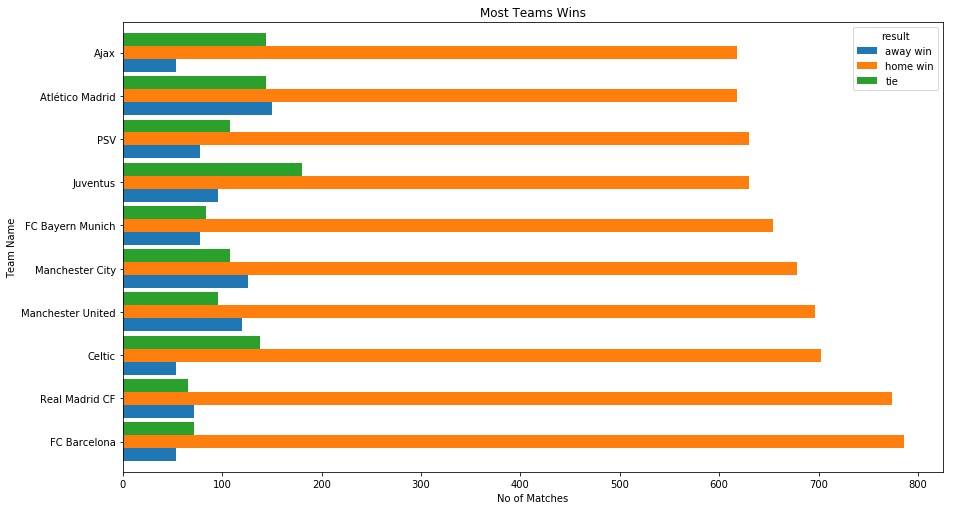

In [78]:
(df_Match_Team_Coun_Leag.groupby(['home_team','result'])
                        .size()
                        .unstack('result')
                        .sort_values(by='home win',ascending=False)[:10]
                        .plot(kind='barh',figsize=[14.7,8.27],width=0.9));
plt.title('Most Teams Wins');
plt.xlabel('No of Matches');
plt.ylabel('Team Name');

# Communication 1
## BAR chart for 10 most team wins in the period betn 2008 - 2016 
### I’d like you to look at this graph , Let me show you that :-
#### FC Barcelona is the most team wins , and FC Bayern  is in the 6 place

# Research Q2. which players had the most penalties ?

In [79]:
df_Player_Attributes_cleaned.fillna(df_Player_Attributes_cleaned.mean(),inplace=True)

In [80]:
df_comp1=pd.merge(df_Player_Attributes_cleaned,df_Player,on='player_api_id',how='inner')
df_comp1.groupby('player_name')['penalties'].max().sort_values(ascending=False).head(10)

player_name
Rickie Lambert     96.0
Mario Balotelli    95.0
Andrea Pirlo       95.0
Xavi Hernandez     95.0
Paul Scholes       95.0
David Trezeguet    94.0
Roy Makaay         94.0
Paolo Maldini      94.0
Adrian Mutu        94.0
Cesc Fabregas      94.0
Name: penalties, dtype: float64

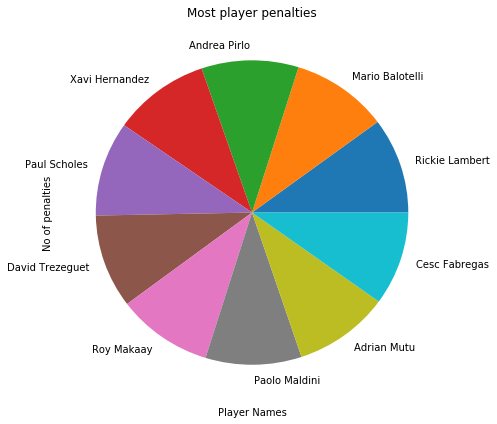

In [81]:
df_comp1.groupby('player_name')['penalties'].max().sort_values(ascending=False)[:10].plot(kind='pie',figsize=[7,7]);

plt.title('Most player penalties');
plt.xlabel('Player Names');
plt.ylabel('No of penalties');

# Communication 2 
## PIE chart for 10 most players had penalties in the period betn 2008 - 2016 
### I’d like you to look at this graph , Let me show you that :-
#### all 10 top players seem the same , but the most player is  Rickie Lambert   with  96.0 


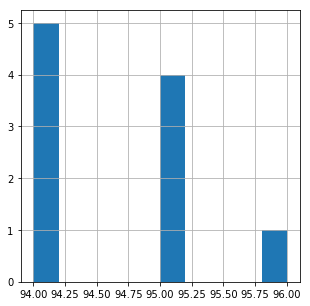

In [82]:
df_comp1.groupby('player_name')['penalties'].max().sort_values(ascending=False)[:10].hist(figsize=[5,5]);

### this is a histogram for most Numbers of penalties ( 94) is the most repeated , then (95)

## Another soln. Using SQL

In [83]:
df_Player_Attributes.columns
 

Index(['player_fifa_api_id', 'player_api_id', 'penalties'], dtype='object')

In [84]:
df_Compined_Data_Player=pd.read_sql_query("""SELECT Player.player_api_id , Player.player_name,
                             Player_Attributes.player_api_id , Player_Attributes.penalties
                             FROM Player
                             INNER JOIN Player_Attributes ON
                             Player.player_api_id = Player_Attributes.player_api_id ; """,engine) 
df_Compined_Data_Player.head()                             



,player_api_id,player_name,player_api_id,penalties
0,505942,Aaron Appindangoye,505942,48.0
1,505942,Aaron Appindangoye,505942,48.0
2,505942,Aaron Appindangoye,505942,48.0
3,505942,Aaron Appindangoye,505942,47.0
4,505942,Aaron Appindangoye,505942,47.0


In [85]:
df_Compined_Data_Player.groupby('player_name')['penalties'].max().sort_values(ascending=False).head(10)


player_name
Rickie Lambert     96.0
Mario Balotelli    95.0
Andrea Pirlo       95.0
Xavi Hernandez     95.0
Paul Scholes       95.0
Paolo Maldini      94.0
David Trezeguet    94.0
Fabio Cannavaro    94.0
Roy Makaay         94.0
Cesc Fabregas      94.0
Name: penalties, dtype: float64

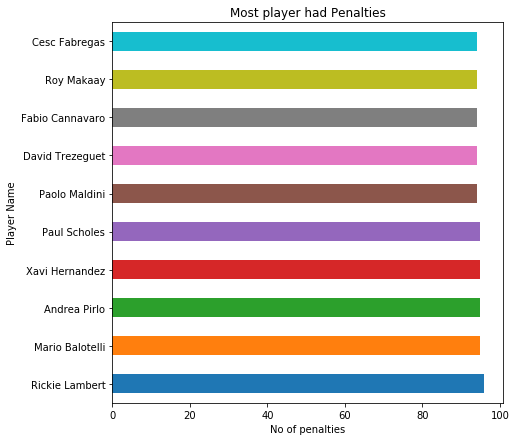

In [86]:
df_Compined_Data_Player.groupby('player_name')['penalties'].max().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(7,7),width=.5);
plt.title('Most player had Penalties');
plt.xlabel('No of penalties');
plt.ylabel('Player Name');

In [92]:
df_comp1_correlation=df_comp1.corr(method='pearson')

In [ ]:
pd.plotting.scatter_matrix(df_comp1,figsize=(15,15));

<a id='conclusions'></a>
# Conclusions

### Finally i succeeded in the analysis of data for European soccer players and teams , to get :
#### 1- most team victories
#### 2- most players had penalties


## Limitations

##### I faced many problems like :
1- the data wasn't clear enough to deal with it , but i have to drop Nan values and remove unused columns .

2- to answer the first question i had to create a new columns indicates to result , then i do (unstack()) function to extract 3 variables .

3- the major diffculties were to join all tables to get what information we need it

4- there are many columns unuseful and they are removed 
 


## Submitting your Project 

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_Soccer DB Sql.ipynb'])

0